# Problem Set 4

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set so make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 3.3 will be relatively painless or incredibly painful. 
* Do the extra credit problems last!

---

## Introduction to the assignment

As with the last assignment, you will be using the Boston Housing Prices Data Set.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import random
%matplotlib inline   
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 

In [2]:
# Load the Boston Housing data into a dataframe
# Target.txt contains the median house values and Data.txt contains the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

---

## Part 1: Getting Oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, explore the relationship between  median housing price and the percentage of lower status of the population using a linear regression model. Do this by - 
- (a) Regressing the `MEDV` (median housing price) on `LSTAT` (Percentage of lower status of the population)
- (b) Regressing the `MEDV` (median housing price) on `LSTAT` **and** the natural log transformed value of `LSTAT`

Interpret the results of both models by comparing them in terms of coefficients, their statistical significance and the variance explained by each model.


*Hint-*
* *You can use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn and OLS model from stats package.*

In [3]:
df = pd.DataFrame(data, columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'
 ,'B', 'LSTAT'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.205345,0.0,11.992590,0.0,0.686750,6.895386,69.1,2.805111,1.0,282.0,21.325449,395.822256,9.795056
502,0.120722,0.0,11.994115,0.0,0.583991,6.313574,76.7,2.652694,1.0,282.0,21.032632,398.559567,9.785685
503,0.226099,0.0,12.254201,0.0,0.689092,7.199346,91.0,2.348891,1.0,284.0,21.042043,398.026747,5.831161
504,0.139833,0.0,12.054379,0.0,0.650875,7.065029,89.3,2.783274,1.0,275.0,21.105130,395.290366,6.890841


In [4]:
lstat = df[['LSTAT']]
lstat 

,LSTAT
0,5.715647
1,9.338417
2,4.142473
3,3.239272
4,6.115159
...,...
501,9.795056
502,9.785685
503,5.831161
504,6.890841


In [5]:
# Regressing the MEDV on LSTAT
from sklearn.linear_model import LinearRegression
X = lstat
y = target
reg_X = LinearRegression().fit(X, y)
#reg_X.score(X, y)
#reg.intercept_

In [6]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error

y_train_predict = reg_X.predict(X)
rmse = (np.sqrt(mean_squared_error(y, y_train_predict)))
r2 = reg_X.score(X, y)
intercept = reg_X.intercept_
coe = reg_X.coef_

print("The model performance for training set")
print("--------------------------------------")
print('Intercept is {}'.format(intercept))
print('Coefficient is {}'.format(coe))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
Intercept is 34.93274191627465
Coefficient is [-0.94876815]
RMSE is 6.216088147787075
R2 score is 0.5422890901063222




In [7]:
#log transform
lstat['log'] = np.log(lstat['LSTAT'])
lstat

<ipython-input-7-58a7c2a1af49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstat['log'] = np.log(lstat['LSTAT'])


,LSTAT,log
0,5.715647,1.743207
1,9.338417,2.234137
2,4.142473,1.421293
3,3.239272,1.175349
4,6.115159,1.810771
...,...,...
501,9.795056,2.281878
502,9.785685,2.280921
503,5.831161,1.763216
504,6.890841,1.930193


In [8]:
# Regressing MEDV on log LSTAT
X_log = lstat[['log']]
y = target
reg_log = LinearRegression().fit(X_log, y)
reg_log.score(X_log, y)

0.6562266801567944

In [9]:
logy_train_predict = reg_log.predict(X_log)
rmse_log = (np.sqrt(mean_squared_error(y, logy_train_predict)))
r2_log = reg_log.score(X_log, y)
intercept_log = reg_log.intercept_
coe_log = reg_log.coef_

print("The model performance for training set")
print("--------------------------------------")
print('Intercept is {}'.format(intercept_log))
print('Coefficient is {}'.format(coe_log))
print('RMSE is {}'.format(rmse_log))
print('R2 score is {}'.format(r2_log))
print("\n")

The model performance for training set
--------------------------------------
Intercept is 53.98182755315706
Coefficient is [-13.01424447]
RMSE is 5.387131990168327
R2 score is 0.6562266801567944




- The intercept for MEDV on LSTAT model is 34.93, the intercept for MEDV for log LSTAT is 53.98; 
- The RMSE of MEDV on LSTAT is 6.21, the RMSE of MEDV on log STAT is 5.38, indicates that the Log transformed model fits better than the original  model. 
- The R^2 of the regression MEDV on LSTAT is 0.542; the R^2 of the regresson MEDV on log LSTAT is 0.656, which indicates that the log trasformed model fits better than the original model.


### 1.2 Regression lines

Create a scatterplot of `MEDV` on the y-axis and `LSTAT` on the x-axis, and add the two regression lines from 1.1. Show the linear regression line in red, and the linear+log regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

**Bonus**: Add the 95% confidence bands (i.e.  the area that has a 95% chance of containing the true regression line) to each of these lines.

In [10]:
df_target = pd.DataFrame(target, columns = ['MEDV'])
lmdf = lstat.merge(df_target, left_index= True, right_index= True)[['LSTAT','MEDV','log']]
lmdf

,LSTAT,MEDV,log
0,5.715647,24.0,1.743207
1,9.338417,21.6,2.234137
2,4.142473,34.7,1.421293
3,3.239272,33.4,1.175349
4,6.115159,36.2,1.810771
...,...,...,...
501,9.795056,22.4,2.281878
502,9.785685,20.6,2.280921
503,5.831161,23.9,1.763216
504,6.890841,22.0,1.930193


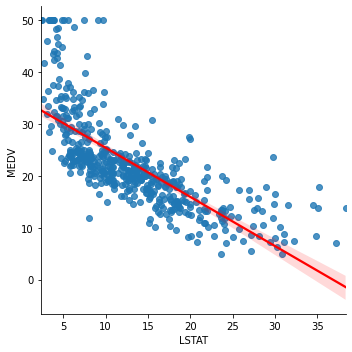

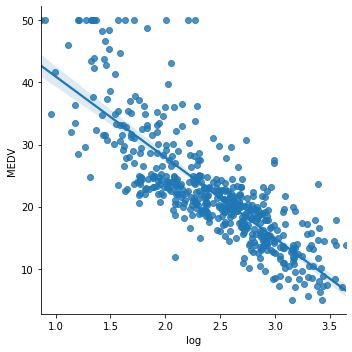

In [11]:
# Your code here
import seaborn as sns
sns.lmplot(x='LSTAT', y='MEDV', data= lmdf,ci = 95, line_kws={'color': 'red'});
#sns.lmplot(x = float(np.log(lmdf['LSTAT'])), y = 'MEDV', data= lmdf);
sns.lmplot(x='log', y= 'MEDV', data = lmdf, ci= 95)

### 1.3 Cross-Validation

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Before you proceed with cross-validation, split your dataset into training and test sets, using a 90-10 split. You can use the [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) functions from sklearn. After that, using the cross-validation functions from scikit-learn, use 40-fold cross-validation to fit regression (a) from above, i.e. the linear fit of `MEDV` on `LSTAT`. Remember to use the **training set only**. We'll touch the test set only later. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 40 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?


*NOTE - In the `train_test_split` function be sure to set a random_state of 42.*

In [12]:
df_2 = df['LSTAT']
#df_2 = df_2.merge(df_target, left_index = True, right_index=True)
df_2

0      5.715647
1      9.338417
2      4.142473
3      3.239272
4      6.115159
         ...   
501    9.795056
502    9.785685
503    5.831161
504    6.890841
505    8.106447
Name: LSTAT, Length: 506, dtype: float64

In [13]:
from sklearn.model_selection import KFold

# split dataset using 90-10 split [array]

x_train, x_test, y_train, y_test = train_test_split(df_2, target,
                                                    test_size=0.1, random_state = 42, shuffle=True)

In [14]:
#sanity check 
len(x_test)/len(lmdf)

0.1007905138339921

In [15]:
x_train

281     4.790841
22     19.228462
101     7.781176
268     3.747244
485    10.610438
         ...    
106    18.847692
270    13.766952
348     6.304298
435    23.699868
102    11.287689
Name: LSTAT, Length: 455, dtype: float64

In [16]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9])

In [17]:
#split in dataframe
X_train, X_test, Y_train, Y_test = train_test_split(df, df_target,
                                                    test_size=0.1, random_state = 42, shuffle=True)

In [18]:
from sklearn.model_selection import cross_validate
import warnings 
warnings.filterwarnings('ignore')

coe = []

lm = sklearn.linear_model.LinearRegression()

cv_results = cross_validate(lm, X_train[['LSTAT']], y_train, cv=40, return_estimator=True)

for model in cv_results["estimator"]:
    coe.append(model.coef_)
    print(model.coef_)

[-0.94695227]
[-0.96076579]
[-0.94755234]
[-0.9673255]
[-0.96389885]
[-0.95277517]
[-0.9627124]
[-0.96125186]
[-0.94730534]
[-0.94795239]
[-0.96646233]
[-0.95305858]
[-0.95664851]
[-0.94083834]
[-0.93644213]
[-0.9602972]
[-0.95611004]
[-0.9595209]
[-0.95241202]
[-0.95597654]
[-0.94664206]
[-0.94756661]
[-0.94489653]
[-0.96711453]
[-0.9496485]
[-0.95882538]
[-0.93529007]
[-0.94582173]
[-0.94364669]
[-0.96037369]
[-0.95599416]
[-0.94712379]
[-0.94852794]
[-0.9547781]
[-0.94969208]
[-0.95281644]
[-0.96141019]
[-0.9500209]
[-0.96442794]
[-0.95981981]


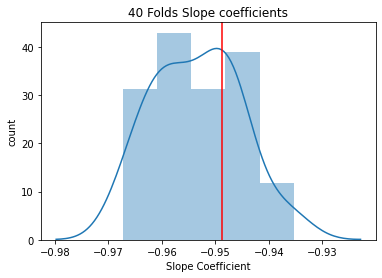

In [19]:
sns.distplot(coe)
plt.title('40 Folds Slope coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('count')

plt.axvline(x=-0.94876815,color='red')


- The coefficient from estimated is -0.94, which is in the most frequent band of the density, according to the density kernel plot. 

## Part 2: Gradient Descent: Linear Regression

This is where it gets fun!

*Note - For all of part 2, only use your training set that you created in 1.3*

### 2.1 Implement gradient descent with one independent variable (LSTAT)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the percentage of lower status of the population i.e. `MEDV`~`LSTAT`. Experiment with 3-4 different values of the learning rate *R*, and do the following for each *R*:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge
* Report the total running time of your algorithm, in seconds

How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.


*HINTS-*
* Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to - 
    * (a) check to see if the loss has stopped decreasing,
    * (b) check if both your current parameter estimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 1e-6).
* We recommend you include a MaxIterations parameter in your gradient descent algorithm, to prevent divergence.

In [20]:
#reference check
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)
print('intercept and slope from stats {}, {}'.format(intercept, slope))

intercept and slope from stats 35.0387926190787, -0.9534939195110951


In [21]:
import time

"""
Function
--------
bivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    coefficient
    
    
"""
import time

def bivariate_ols(xvalues, yvalues, R=0.001, MaxIterations=100000):
    
    start_time = time.time()
    
    #convert to np array 
    x_arr = np.array(xvalues)
    y_arr = np.array(yvalues)
    
    #initialize 
    J = np.inf  #cost function 
    epilon = 1e-6
    
    converged = False
    iteration = 0
    m = len(x_arr)

    alpha = 0.0
    beta = 0.0
      
    #iteration
    while not converged:

        gd_alpha = alpha
        gd_beta = beta
        J_old = J
        
        #update
        alpha = gd_alpha - R / m * ((gd_alpha + gd_beta * x_arr - y_arr).sum())
        beta = gd_beta - R / m * (((gd_alpha + gd_beta * x_arr - y_arr) * x_arr).sum())
        
        #gd0 = 1.0 / m * sum([alpha + beta*xvalues[i] - yvalues[i] for i in range(m)])
        #gd1 = 1.0/m * sum([alpha + beta * xvalues[i] - yvalues[i] * xvalues[i] for i in range(m)])
        
        # cost function 
        J = 1.0 / (2 * m) * ((((alpha + beta * x_arr) - y_arr) ** 2).sum())
        print('cost is: {}'.format(J))
        
        iteration += 1
        
        if iteration == MaxIterations:
            print('Exceeded.')
            converged = True

        if (J_old - J) < 0:
            print('Diverged')
            converged = True
            
        if abs(alpha - gd_alpha) < epilon and abs(beta - gd_beta) < epilon:
            
            print('converge after iterations: {}'.format(iteration))
            converged = True
        
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    
    return alpha, beta

# example function call
print(bivariate_ols(X_train['LSTAT'], y_train))

cost is: 247.01199630699588
cost is: 214.22020753304236
cost is: 194.230581114846
cost is: 182.0348412686854
cost is: 174.5839818162786
cost is: 170.02178734779912
cost is: 167.21820582234318
cost is: 165.48526880018156
cost is: 164.40414550232708
cost is: 163.71985443132561
cost is: 163.27716448134498
cost is: 162.9815719451464
cost is: 162.7755435662337
cost is: 162.62405346138618
cost is: 162.50577809186663
cost is: 162.40773581837138
cost is: 162.32202349646704
cost is: 162.24382973682492
cost is: 162.17022539079537
cost is: 162.09942720578337
cost is: 162.03034954336465
cost is: 161.9623314681501
cost is: 161.8949706012366
cost is: 161.82802197125434
cost is: 161.76133643553237
cost is: 161.69482319129978
cost is: 161.62842695274531
cost is: 161.56211405655742
cost is: 161.49586400306646
cost is: 161.429664306546
cost is: 161.36350736010974
cost is: 161.29738852708047
cost is: 161.2313049790278
cost is: 161.16525498837314
cost is: 161.0992374977321
cost is: 161.03325185773275
cost

- with the proper learning rate and interaction, it converged at interception 35.03, with coefficient -0.953. The answer is the same as using the sklearn function. 
- Different R provides little variation to the results we got. 

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [22]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using `CRIM` and `LSTAT` as independent variables. **Standardize the variables before inputting them to the gradient descent algorithm**. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

*Hint: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem.*

In [23]:
#standardize the x_train matrix with value CRIM & LSTAT
x_train_matrix = X_train[['CRIM', 'LSTAT']]
x_train_matrix = standardize(x_train_matrix)
x_train_matrix

,CRIM,LSTAT
281,-0.414431,-1.137850
22,-0.294653,0.876469
101,-0.400671,-0.720642
268,-0.359325,-1.283451
485,0.020532,-0.325907
...,...,...
106,-0.381875,0.823345
270,-0.378929,0.114486
348,-0.427214,-0.926694
435,0.845334,1.500315


In [24]:
n, m = x_train_matrix.shape
Xr = np.column_stack((np.ones(n), x_train_matrix))
Xr

array([[ 1.        , -0.41443097, -1.13784967],
       [ 1.        , -0.29465267,  0.87646942],
       [ 1.        , -0.40067147, -0.7206419 ],
       ...,
       [ 1.        , -0.42721437, -0.92669405],
       [ 1.        ,  0.84533448,  1.50031452],
       [ 1.        , -0.40810282, -0.23141742]])

In [25]:
#Reference check 
beta = np.linalg.inv(np.matmul(Xr.T, Xr))@Xr.T@y_train
print('intercept and slope from flosed form solution {}'.format(beta))

intercept and slope from flosed form solution [22.69450549 -0.71630884 -6.51930068]


In [26]:
def hypothesis(theta, X):
    return theta * X

In [32]:
"""
Function
--------
multivariate_ols
    Gradient Descent to minimize OLS. Used to find coefficients of multi-variate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    coefficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    
    # your code here
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    
    #455,2
    n, m = xvalue_matrix.shape
    
    #cost_re = 0.0
    cost_list = []
    alpha = 0.0
    beta_arr = np.transpose(np.array([[0.0] * m]))
    cost = np.inf
    epsilon = 1e-6
    
    for i in range(MaxIterations):
        cost_reference = cost
        gd_alpha = alpha
        gd_beta = np.copy(beta_arr)
        
        part_1 = gd_alpha + np.dot(xvalue_matrix, gd_beta) - yvalues
        alpha -= R / n * (part_1.sum())
        
        beta_arr -= R / n * (np.dot(xvalue_matrix.T, part_1))
        part_2 = alpha + np.dot(xvalue_matrix, beta_arr) - yvalues
        
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
        cost_list.append(cost)      
        
    
        if cost_reference - cost < 0:
                print('not converge stopped after iteration times: {}'.format(i))
                print(cost)
                break

        if abs(alpha-gd_alpha) < epsilon and max(abs(beta_arr - gd_beta)) < epsilon:
                print('cost < epsilon stopped after iteration times: {}'.format(i))
                print(cost)
                break


    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_arr, cost, cost_list

In [36]:
alpha, beta_array,cost, cost_list = multivariate_ols(x_train_matrix, y_train, R= 0.1, MaxIterations=1000000)
print('intercept is {} and slope is {}'.format(alpha, beta_array))

cost < epsilon stopped after iteration times: 209
19.752349789121354
Time taken: 0.02 seconds
intercept is 22.694505488922747 and slope is [[-0.71632478]
 [-6.51928474]]


- with the proper learning rate and interaction, it converged at interception 22.69, with coefficient -0.716 for CRIM, and -6.5 for LSTAT controllung for CRIM, the cost is 19.75. The answer is the same as using the sklearn function. 
- Different R provides little variation to the results we got. 

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original training data. Use these three values of R - (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [37]:
x_train_matrix

,CRIM,LSTAT
281,-0.414431,-1.137850
22,-0.294653,0.876469
101,-0.400671,-0.720642
268,-0.359325,-1.283451
485,0.020532,-0.325907
...,...,...
106,-0.381875,0.823345
270,-0.378929,0.114486
348,-0.427214,-0.926694
435,0.845334,1.500315


In [39]:
#non standardized x
x_nastd = X_train[['CRIM', 'LSTAT']]
x_nastd = np.array(x_nastd[:])
x_nastd

array([[2.43279335e-01, 4.79084131e+00],
       [1.28821167e+00, 1.92284616e+01],
       [3.63315612e-01, 7.78117554e+00],
       [7.24018016e-01, 3.74724412e+00],
       [4.03784835e+00, 1.06104379e+01],
       [6.03164095e+00, 1.72014318e+01],
       [5.94966341e-02, 3.34501069e+00],
       [3.27075755e-01, 1.02129759e+01],
       [3.44085122e-01, 1.86437990e+01],
       [2.28063136e-01, 1.02037091e+01],
       [2.69666340e-01, 5.24559853e+00],
       [4.58152542e-01, 4.20152743e+00],
       [9.12069573e-01, 1.20504248e+01],
       [2.06220515e-01, 5.84817334e+00],
       [5.24695296e-01, 2.36832328e+01],
       [8.74244530e+00, 1.76772209e+01],
       [1.04104139e-01, 6.97873413e+00],
       [1.00177824e-01, 4.36506921e+00],
       [4.78916425e+00, 1.97062185e+01],
       [4.47743997e-01, 1.42867194e+01],
       [5.83564016e+00, 8.52849366e+00],
       [1.31447877e+01, 2.39902498e+01],
       [4.76080155e-01, 5.80780596e+00],
       [4.26499318e-01, 1.06955175e+01],
       [3.840582

In [41]:
# Your code here
alpha, beta_array, cost, cost_list = multivariate_ols(x_nastd, y_train, 0.001, 1000000)
print('intercept is {} and slope is {}'.format(alpha, beta_array))

cost < epsilon stopped after iteration times: 39748
19.752352013720344
Time taken: 1.91 seconds
intercept is 34.78247382136398 and slope is [[-0.08215959]
 [-0.90928457]]


- Using the non-standardized the x train, we got the intercept term at 34.78, with the coefficient -0.08216 for CRIM, -0.91 for LSTAT controlling for CRIM, the cost is 19.75. 
- using non-standardized dataset takes longer and more interations to converge.

### Extra Credit 1 :  Implement  Mini-Batch Gradient Descent (MB-GD)
MB-GD is a Gradient Descent variant that in large data sets can converge faster and is computationally less intensive. Implement MB-GD for question 2.3 (ensure you're using standardized data). Experiment with different values for the learning rate, number of iterations and "mini-batch" size
so that you compute the estimates within a 1e-3 tolerance. Do not use a batch-size greater than 32.
MB-GD is similar to Stochastic Gradient Descent but instead of using one sample to compute the gradient we use a batch of samples at each iteration. 

In [448]:
from sklearn.utils import shuffle

"""
Function
--------
MBGD_multivariate_ols
    Minibatch gradient descent for multi-variate OLS

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
Batch_Size : Int
    batch size of mini-batches

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    coefficient
"""

def MBGD_multivariate_ols(xvalue_matrix, yvalues, R, MaxIterations, BATCH_SIZE):
    start_time = time.time()
    # Your code here
    
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape 
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 1e-6
    cost_l = []
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array) 
        X, y = shuffle(xvalue_matrix, yvalues)
        for offset in range(0, n, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X[offset:end], y[offset:end]
            part_1 = alpha_old + np.dot(batch_x, beta_array_old) - batch_y 
            alpha -= R / n * (part_1.sum())
            beta_array -= R / n * (np.dot(batch_x.T, part_1))
            part_2 = alpha + np.dot(batch_x, beta_array) - batch_y 
            cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
            cost_l.append(cost)
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < epsilon stopped after iteration times: {}'.format(i))  
            break
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [451]:
alpha, beta_array = MBGD_multivariate_ols(x_nastd, y_train, R = 0.001, MaxIterations = 1000000, BATCH_SIZE = 20)
print('intercept is {} and slope is {}'.format(alpha, beta_array))

cost < epsilon stopped after iteration times: 39748
Time taken: 21.83 seconds
intercept is 34.78247382136446 and slope is [[-0.08215959]
 [-0.90928457]]


- takes longer time for it to converge using Batch size of 20

### Extra Credit 2: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model to estimate a logistic regression of EXPENSIVE on CHAS and RM. Report your results and interpret the coefficients (i.e., explain what they imply in a sentence that your parents would understand).

In [ ]:
# Your code here

*Enter your observations here.*

## 3 Regularization 

### 3.1 Get prepped

Using the non-standardized train and test sets you created in 1.3, for each set create new interaction variables between each possible pair of the features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Now standardize all of your features. For expediency, it is okay if you standardize the training and test sets separately, i.e., you do not need to use the mean and standard deviation of the training set to also standardize the test set.

In [184]:
13 +(13 *(13 + 1))/2 

104.0

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False,include_bias = False)
poly.fit_transform(X_train)

#feature names for the interactable terms
fea = poly.get_feature_names(['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'
 ,'B', 'LSTAT'])

In [43]:
#create dataframe with the new interactable terms
poly_df = PolynomialFeatures(2, interaction_only=False,include_bias = False).fit_transform(X_train)

interaction_df_train = pd.DataFrame(poly_df,columns = fea) 
interaction_df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.243279,20.0,3.591158,0.0,0.477530,7.253986,37.2,5.316362,5.0,222.0,...,49284.0,3388.374382,87092.100177,1063.566772,232.957572,5987.757510,73.122360,153904.592022,1879.479422,22.952160
1,1.288212,0.0,8.396007,0.0,0.828895,6.352837,91.7,4.027089,4.0,321.0,...,103041.0,6748.667435,127570.217179,6172.336173,442.003786,8355.207833,404.256986,157938.687620,7641.679197,369.733735
2,0.363316,0.0,8.612941,0.0,0.790178,6.899833,71.3,3.075688,5.0,398.0,...,158404.0,8329.537328,158189.319442,3096.907867,438.001516,8318.248537,162.848221,157974.929835,3092.710713,60.546693
3,0.724018,20.0,4.313429,0.0,0.633919,7.542262,52.6,3.077803,5.0,271.0,...,73441.0,3542.066084,106175.678957,1015.503155,170.834168,5120.862615,48.977809,153501.107039,1468.140916,14.041838
4,4.037848,0.0,18.260338,0.0,0.739098,6.657364,51.9,4.377997,24.0,674.0,...,454276.0,13618.178368,262935.638931,7151.435129,408.242527,7882.222328,214.384029,152187.547263,4139.261517,112.581392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.527291,0.0,8.619423,0.0,0.534362,5.958681,91.9,2.343085,5.0,391.0,...,152881.0,8255.604690,156128.554203,7369.447524,445.804310,8430.973268,397.951646,159445.094142,7525.992027,355.235489
451,0.552991,20.0,7.105314,0.0,0.478509,6.083343,42.1,4.827248,3.0,235.0,...,55225.0,4445.612468,92063.627682,3235.233769,357.871801,7411.121974,260.436317,153475.989895,5393.342820,189.528973
452,0.131758,80.0,2.156004,0.0,0.775983,6.905930,29.7,8.392276,4.0,282.0,...,79524.0,4884.819680,110969.739841,1777.812026,300.053610,6816.397176,109.203400,154849.896388,2480.802500,39.744173
453,11.233330,0.0,18.133083,0.0,0.981969,6.962880,94.6,2.221655,24.0,674.0,...,454276.0,13798.809250,76603.152662,15973.710777,419.144169,2326.850398,485.207645,12917.352001,2693.597296,561.683725


In [44]:
#standardize dataframe
interaction_df_train = standardize(interaction_df_train)
interaction_df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,-0.414431,0.344513,-1.109292,-0.270395,-1.629260,1.058991,-1.102673,0.591875,-0.523106,-1.150344,...,-0.949478,-1.196509,-0.834765,-0.957297,-1.516029,-0.331618,-1.173005,0.410322,-0.940641,-0.812277
1,-0.294653,-0.499723,-0.413017,-0.270395,0.470928,-0.205380,0.832605,-0.001771,-0.638367,-0.560096,...,-0.611515,-0.304913,-0.209715,0.027942,1.153955,0.924016,1.061611,0.504055,1.225239,0.624664
2,-0.400671,-0.499723,-0.381581,-0.270395,0.239510,0.562092,0.108207,-0.439845,-0.523106,-0.101015,...,-0.263455,0.114544,0.263094,-0.565162,1.102837,0.904414,-0.567502,0.504897,-0.484615,-0.656498
3,-0.359325,0.344513,-1.004627,-0.270395,-0.694489,1.463462,-0.555824,-0.438871,-0.523106,-0.858201,...,-0.797606,-1.155730,-0.540083,-0.966566,-2.309483,-0.791396,-1.335941,0.400947,-1.095254,-0.849198
4,0.020532,-0.499723,1.016432,-0.270395,-0.065810,0.221891,-0.580681,0.159804,1.666847,1.544523,...,1.596652,1.517796,1.880552,0.216764,0.722749,0.673157,-0.219720,0.370426,-0.091240,-0.440885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.381875,-0.499723,-0.380642,-0.270395,-1.289562,-0.758408,0.839707,-0.777172,-0.523106,-0.142750,...,-0.298178,0.094928,0.231273,0.258808,1.202496,0.964200,1.019060,0.539056,1.181755,0.564588
451,-0.378929,0.344513,-0.600052,-0.270395,-1.623405,-0.583497,-0.928676,0.366663,-0.753628,-1.072836,...,-0.912128,-0.915989,-0.757996,-0.538485,0.079403,0.423298,0.091057,0.400363,0.380141,-0.122041
452,-0.427214,2.877222,-1.317261,-0.270395,0.154662,0.570646,-1.368996,2.008182,-0.638367,-0.792618,...,-0.759363,-0.799453,-0.466054,-0.819553,-0.659064,0.107871,-0.929517,0.432286,-0.714617,-0.742696
453,0.845334,-0.499723,0.997991,-0.270395,1.385888,0.650550,0.935583,-0.833085,1.666847,1.544523,...,1.596652,1.565723,-0.996732,1.918161,0.861987,-2.273267,1.607895,-2.865533,-0.634632,1.420037


In [38]:
#create X_test dataframe with the new interactable terms
poly_df = PolynomialFeatures(2, interaction_only=False,include_bias = False).fit_transform(X_test)

interaction_df_test = pd.DataFrame(poly_df,columns = fea) 
interaction_df_test = standardize(interaction_df_test)
interaction_df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,-0.399345,-0.376101,-1.247057,-0.291730,-0.471680,0.351548,0.458486,-0.534920,-0.522275,-0.683321,...,-0.697159,-0.813053,-0.494189,-0.720027,-1.318035,-0.325300,-0.801570,0.392674,-0.537399,-0.636877
1,-0.422825,1.734619,-0.871977,3.427827,-0.704024,1.037957,-1.397060,0.448303,-0.634663,-0.860803,...,-0.802526,-0.862496,-0.665554,-1.081334,-0.690546,0.036740,-1.440370,0.464686,-1.518683,-0.964232
2,-0.392700,-0.376101,2.498317,-0.291730,1.477510,-0.315589,0.991231,-1.116107,-0.634663,1.726994,...,1.878555,1.649588,1.964394,1.276217,0.616997,0.580697,0.631931,0.327342,0.886838,0.340722
3,-0.385662,-0.376101,-0.181495,-0.291730,0.288247,-0.445389,-2.306713,1.318118,-0.634663,-0.597443,...,-0.642024,-0.535750,-0.416031,-0.908657,0.096587,0.351718,-1.099931,0.338544,-1.148547,-0.870386
4,0.259798,-0.376101,0.954769,-0.291730,0.764079,-0.032502,0.737543,-0.768319,1.613102,1.429283,...,1.444983,1.425744,1.584601,1.011639,0.782371,0.549458,0.580161,0.148815,0.727293,0.251216
5,-0.399571,-0.376101,0.128146,-0.291730,-1.759635,0.175626,0.110571,0.281906,-0.522275,-0.099349,...,-0.268857,-0.120548,-0.020531,-0.310233,-0.003344,0.054453,-0.267208,-0.116326,-0.185324,-0.384822
6,-0.351311,-0.376101,-0.345260,-0.291730,0.633918,-0.485572,0.425869,0.288177,-0.634663,-0.574542,...,-0.626864,-0.578842,-0.396919,-0.133035,-0.338401,0.134768,0.473740,0.316235,0.951587,0.402126
7,-0.395778,-0.376101,1.542373,-0.291730,0.759293,-0.217940,0.802777,-1.348096,-0.634663,0.129659,...,-0.066725,0.363710,0.317871,0.851219,1.534846,0.951384,1.820419,0.293651,1.994299,1.517395
8,0.112455,-0.376101,0.970291,-0.291730,-0.620044,-0.198081,0.697677,-0.447971,1.613102,1.446459,...,1.469112,1.451681,1.700936,0.461131,0.818117,0.702295,-0.025202,0.385457,0.073347,-0.294929
9,-0.412403,-0.376101,-0.331687,-0.291730,0.405427,-0.382341,0.299025,-0.737294,-0.409887,-0.145151,...,-0.306973,-0.143872,0.081154,-0.135594,0.088205,0.421533,0.087567,0.475396,0.385117,-0.097400


### 3.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can. If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Keep track of the training RMSE each time you add a new feature. Plot a line graph with number of features on the x-axis and training RMSE on the y-axis. 

*NOTE-*
* *You can set the MaxIterations as 1e5*

In [56]:
#test over 5 features
test_1 = interaction_df_train.iloc[:,0:5]
test_1

,CRIM,ZN,INDUS,CHAS,NOX
0,-0.414431,0.344513,-1.109292,-0.270395,-1.629260
1,-0.294653,-0.499723,-0.413017,-0.270395,0.470928
2,-0.400671,-0.499723,-0.381581,-0.270395,0.239510
3,-0.359325,0.344513,-1.004627,-0.270395,-0.694489
4,0.020532,-0.499723,1.016432,-0.270395,-0.065810
...,...,...,...,...,...
450,-0.381875,-0.499723,-0.380642,-0.270395,-1.289562
451,-0.378929,0.344513,-0.600052,-0.270395,-1.623405
452,-0.427214,2.877222,-1.317261,-0.270395,0.154662
453,0.845334,-0.499723,0.997991,-0.270395,1.385888


In [58]:
len(y_train)

455

In [63]:
#regress housing price on 5 features
alpha, beta_array,cost, cost_list = multivariate_ols(test_1, y_train, 0.001, 1000000)
print('intercept is {} and slope is {}, the RMSE cost is {}'.format(alpha, beta_array, cost))

cost < epsilon stopped after iteration times: 17784
29.55908737327481
Time taken: 1.25 seconds
intercept is 22.694505069759927 and slope is [[-1.96136063]
 [ 0.95041726]
 [-3.17783127]
 [ 1.88175159]
 [-0.13425481]], the RMSE cost is 29.55908737327481


In [73]:
#loop the features
cost_plt = []
for i in range(30):
    split_train_df = interaction_df_train.iloc[:,0:i+1]
    #print(split_train_df)
    alpha, beta_array,cost, cost_list = multivariate_ols(split_train_df, y_train, 0.001, 1000000)
    print(str(i+1) +'th column')
    print('intercept is {} and slope is {}, the RMSE cost is {}'.format(alpha, beta_array, cost))
    print('-----------')
    cost_plt.append(cost)

print(cost_plt)

cost < epsilon stopped after iteration times: 10025
36.897073590553305
Time taken: 0.25 seconds
1th column
intercept is 22.693506632077 and slope is [[-3.58178109]], the RMSE cost is 36.897073590553305
-----------
cost < epsilon stopped after iteration times: 10025
34.16123376486273
Time taken: 0.74 seconds
2th column
intercept is 22.693506632077 and slope is [[-3.0915694 ]
 [ 2.39008633]], the RMSE cost is 34.16123376486273
-----------
cost < epsilon stopped after iteration times: 13984
31.302213327381978
Time taken: 0.98 seconds
3th column
intercept is 22.694486471743986 and slope is [[-2.15328051]
 [ 0.94957549]
 [-3.03675932]], the RMSE cost is 31.302213327381978
-----------
cost < epsilon stopped after iteration times: 14769
29.564454924030485
Time taken: 1.11 seconds
4th column
intercept is 22.694496821256404 and slope is [[-1.97501037]
 [ 0.97001933]
 [-3.24265429]
 [ 1.87680368]], the RMSE cost is 29.564454924030485
-----------
cost < epsilon stopped after iteration times: 1778

In [76]:
#NEEDS RMSE FUNCTION IN THE GD FOR THE RMSE PER FOLD
result = [] 
for i in range (1, 31): 
    result.append(i)

print(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [77]:
cost_df = pd.DataFrame(cost_plt,columns=['RMSE'])
cost_df["feature"] = result
print (cost_df)

         RMSE  feature
0   36.897074        1
1   34.161234        2
2   31.302213        3
3   29.564455        4
4   29.559087        5
5   18.865657        6
6   18.773982        7
7   17.183339        8
8   17.079867        9
9   16.706065       10
10  15.831133       11
11  14.937393       12
12  11.772259       13
13  11.754406       14
14  11.752032       15
15  11.751965       16
16  11.423931       17
17  11.241425       18
18  10.438737       19
19  10.427922       20
20  10.302868       21
21  10.314761       22
22  10.308046       23
23  10.292852       24
24  10.289770       25
25  10.228530       26
26  10.127042       27
27  10.071447       28
28   9.987386       29
29   9.773054       30


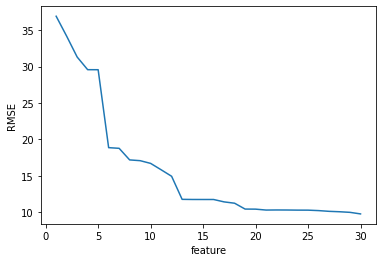

In [79]:
#line plot based on the number of feature and the relationship between RMSE
sns.lineplot(x = 'feature', y = 'RMSE',data= cost_df)
plt.show()

In [83]:
#regress housing price on all K+(K*(K+1))/2 features
alpha, beta_array,cost, cost_list = multivariate_ols(interaction_df_train, y_train, 0.001, 1000000)
print('intercept is {} and slope is {}, the RMSE cost is {}'.format(alpha, beta_array, cost))

Time taken: 256.69 seconds
intercept is 22.694505494503783 and slope is [[-0.79833782]
 [-5.07975338]
 [-1.71228541]
 [ 3.36166031]
 [ 1.8438293 ]
 [ 9.46351095]
 [ 5.67316322]
 [-5.88717071]
 [ 7.40650112]
 [ 3.44772829]
 [ 3.0075792 ]
 [ 4.16103575]
 [ 4.65471484]
 [ 0.9298755 ]
 [ 0.13924652]
 [ 1.85508752]
 [ 2.87416316]
 [ 0.66796739]
 [ 3.80506599]
 [-3.04516034]
 [-0.55146259]
 [-2.98783961]
 [-0.45414541]
 [-2.49682628]
 [-0.61093461]
 [ 2.25326029]
 [ 1.42981288]
 [ 0.19345796]
 [-0.3205289 ]
 [ 1.48423903]
 [ 1.56754984]
 [ 0.19716869]
 [-1.97629288]
 [-0.54576612]
 [ 2.33627798]
 [ 1.37306165]
 [-0.54945152]
 [-0.78569078]
 [ 5.66957039]
 [-1.1634074 ]
 [-1.66073038]
 [ 0.85715245]
 [ 1.21285458]
 [ 0.84995609]
 [ 2.80678656]
 [ 1.72116512]
 [-6.12706185]
 [ 0.65826144]
 [-4.24874874]
 [ 3.36166031]
 [-1.74715251]
 [-7.63924642]
 [ 0.94904513]
 [ 1.14150823]
 [-2.53028812]
 [ 0.34262419]
 [ 1.35314452]
 [ 1.79060207]
 [-1.79759233]
 [-1.38612095]
 [-1.65475416]
 [ 1.56549938

### 3.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your `multivariate_ols` regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model using all features from the training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training set. How do these numbers compare to each other, to the RMSE from 3.2?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [153]:
from sklearn.metrics import mean_squared_error

def multivariate_ols_ridge(xvalue_matrix, yvalues, R=0.001, lamb = 0.0, MaxIterations=1000):
    start_time = time.time()
    
    # your code here
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    
    #455,2
    n, m = xvalue_matrix.shape
    
    alpha = 0.0
    beta_arr = np.transpose(np.array([[0.0] * m]))
    cost = np.inf
    epsilon = 1e-6
    
    
    for i in range(MaxIterations):
        cost_reference = cost
        gd_alpha = alpha
        gd_beta = np.copy(beta_arr)
        
        part_1 = gd_alpha + np.dot(xvalue_matrix, gd_beta) - yvalues
        alpha -= R / n * (part_1.sum())
        
        beta_arr  = beta_arr*(1 - (R * lamb) / n) - R / n * (np.dot(xvalue_matrix.T, part_1))
        #beta_arr  -= ((beta_arr * R * lamb) / n) - R / n * (np.dot(xvalue_matrix.T, part_1))
        
        part_2 = alpha + np.dot(xvalue_matrix, beta_arr) - yvalues
        
        penal = lamb * ((beta_arr ** 2).sum())
        
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum()) + penal
        
        if i % 10000 == 0:
            print('iteration ', i, ': ', cost)
        
#         print(rmse)
    
        if cost_reference - cost < 0:
                print('not converge stopped after iteration times: {}'.format(i))
                rmse = np.sqrt((part_1**2 / len(yvalues)))
                break

        if abs(alpha-gd_alpha) < epsilon and max(abs(beta_arr - gd_beta)) < epsilon:
                rmse = np.sqrt((part_1**2 / len(yvalues)))
                
                print('cost < epsilon stopped after iteration times: {}'.format(i))
                break


    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_arr, rmse[len(rmse)-1]

In [156]:
#reference check using linear model ridge
reg = sklearn.linear_model.Ridge(alpha = 0.1)
reg.fit(test_1, y_train)
print("R square of testing set: {:.2f}".format(reg.score(test_1, y_train)))
print(reg.coef_)

R square of testing set: 0.32
[-1.96054778  0.94949458 -3.17955157  1.88142276 -0.13323374]


In [158]:
alpha, beta_array,rmse = multivariate_ols_ridge(test_1, y_train, R=0.0001, lamb=0.1, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  300.775696199437
iteration  10000 :  66.20339563699801
iteration  20000 :  35.888884992505886
iteration  30000 :  31.85112901184776
iteration  40000 :  31.34381224114274
not converge stopped after iteration times: 48189
Time taken: 3.75 seconds
intercept is 22.511294739036906 and slope is [[-2.00019003]
 [ 1.03307922]
 [-2.90289019]
 [ 1.86114408]
 [-0.32611828]], the cost is [0.21471565]


In [132]:
alpha, beta_array,rmse = multivariate_ols_ridge(interaction_df_train, y_train, R=0.001, lamb=0.1, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  298.98594629387
not converge stopped after iteration times: 4614
Time taken: 0.43 seconds
intercept is 22.470298639408416 and slope is [[ 7.01623601e-03]
 [-4.28768474e-03]
 [ 8.06685086e-02]
 [ 6.84260662e-02]
 [-7.95777828e-02]
 [ 1.19406358e+00]
 [ 1.00203676e-01]
 [-3.03368649e-01]
 [ 4.77411317e-01]
 [-1.44025512e-01]
 [-5.44879657e-01]
 [ 2.11802647e-01]
 [-5.64177343e-01]
 [-4.37168390e-02]
 [ 1.07353739e-01]
 [ 2.01190095e-03]
 [ 9.61326980e-01]
 [-1.89186804e-01]
 [-3.42815328e-01]
 [ 3.13331121e-02]
 [-2.60171968e-01]
 [ 1.99169643e-02]
 [ 1.18775208e-02]
 [ 1.26687723e-03]
 [-3.49072384e-01]
 [ 3.23916690e-03]
 [ 1.66697913e-01]
 [-4.13781328e-01]
 [ 2.88323685e-01]
 [ 4.56429254e-01]
 [ 3.31925194e-01]
 [ 1.40364225e-01]
 [-9.00486609e-02]
 [ 3.57845202e-02]
 [-1.04071582e-01]
 [ 3.84818414e-02]
 [ 1.06332882e-02]
 [-4.10452304e-01]
 [ 4.70758230e-01]
 [-1.58336803e-01]
 [-2.82600019e-01]
 [-3.61063125e-01]
 [ 1.12341343e-01]
 [-5.41932116e-01]
 [ 3.13385626

In [133]:
alpha, beta_array,rmse = multivariate_ols_ridge(interaction_df_train, y_train, R=0.001, lamb=1, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  298.98716698158466
not converge stopped after iteration times: 2603
Time taken: 0.31 seconds
intercept is 21.017818234232468 and slope is [[-0.02447253]
 [ 0.03445023]
 [ 0.01096944]
 [ 0.04304876]
 [-0.13425681]
 [ 1.13599257]
 [ 0.06068266]
 [-0.23896558]
 [ 0.33396284]
 [-0.15565273]
 [-0.60834144]
 [ 0.21911067]
 [-0.55125349]
 [-0.09625291]
 [ 0.12170655]
 [-0.02660576]
 [ 0.71892883]
 [-0.15934033]
 [-0.22866452]
 [-0.00425203]
 [-0.19500314]
 [-0.01331272]
 [-0.02043909]
 [-0.02992177]
 [-0.22189172]
 [-0.03170057]
 [ 0.1375803 ]
 [-0.2892619 ]
 [ 0.31388442]
 [ 0.30888201]
 [ 0.26264569]
 [ 0.13810419]
 [-0.05340987]
 [ 0.05036394]
 [-0.08275714]
 [ 0.01761255]
 [ 0.04283048]
 [-0.30875182]
 [ 0.27377963]
 [-0.06971779]
 [-0.23105492]
 [-0.18918366]
 [ 0.05752465]
 [-0.46239517]
 [ 0.22679106]
 [ 0.13674321]
 [-0.02670445]
 [ 0.17216427]
 [-0.29041947]
 [ 0.04304876]
 [-0.23620682]
 [ 0.05698199]
 [ 0.09171562]
 [ 0.01101393]
 [ 0.19701263]
 [ 0.08189628]
 [ 0.0

- The RMSE is lower comparing to the non-standardized 3.2, using the lamda as 0.01. The RMSE with the Ridge regularization is 0.14, while the RMSE from 3.2 is 3.97.
- Using different lamda have different RMSE value, the RMSE for lambda takes the value of 0.1 is 0.007, the RMSE for lambda takes the value of 1 is 0.055. Which all are lower than the RMSE reported from 3.2 (non-regulizaed)
   

### 3.4 Cross-validate lambda

Up to this point, you have been fitting models and performing regularization (and basic tuning of the lambda hyperparameter) without cross-validation. This could easily lead to overfitting. Fix this by using 5-fold cross-validation on your training set to repeat 3.3 in a more systematic way.

Specifically, use 5-fold cross-validation to select the optimal value of lambda, using the lambda values `[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]`. For each value of lambda, you should run 5-fold cross-validation, and report the average cross-validated RMSE across the 5 validation folds.  Create a figure that plots the average cross-validated RMSE (y-axis) as a function of lambda (x-axis).

Finally, select the value of lambda that minimizes cross-validated RMSE, and use it to evaluate test performance (remember, this is your holdout set from 1.3!). How does the test RMSE compare to the cross-validated RMSE? How does it compare to RMSE from nearest neighbors in PS3?


*Note-*:
* Don't forget to use standardized data!
* Your plot might be prettier if you show the x-axis in log scale.

In [72]:
len(Y_train)

455

In [125]:
stand_df = interaction_df_train.merge(Y_train, left_index= True, right_index= True)
stand_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2,MEDV
1,-0.294653,-0.499723,-0.413017,-0.270395,0.470928,-0.205380,0.832605,-0.001771,-0.638367,-0.560096,...,-0.304913,-0.209715,0.027942,1.153955,0.924016,1.061611,0.504055,1.225239,0.624664,21.6
3,-0.359325,0.344513,-1.004627,-0.270395,-0.694489,1.463462,-0.555824,-0.438871,-0.523106,-0.858201,...,-1.155730,-0.540083,-0.966566,-2.309483,-0.791396,-1.335941,0.400947,-1.095254,-0.849198,33.4
4,0.020532,-0.499723,1.016432,-0.270395,-0.065810,0.221891,-0.580681,0.159804,1.666847,1.544523,...,1.517796,1.880552,0.216764,0.722749,0.673157,-0.219720,0.370426,-0.091240,-0.440885,36.2
5,0.249076,-0.499723,1.050518,-0.270395,0.520389,-0.237704,1.127335,-0.789579,1.666847,1.514713,...,1.553806,1.942185,1.056891,0.906992,0.843222,0.720045,0.533273,0.932652,0.318679,28.7
6,-0.435498,2.877222,-0.877397,-0.270395,-1.595662,0.579488,-1.432913,0.588317,-0.638367,-1.001291,...,-0.813137,-0.660455,-1.003070,0.399055,0.626301,-1.224750,0.520437,-1.146305,-0.861019,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-0.265779,-0.499723,-0.401328,-0.270395,0.172414,-0.833376,1.059867,-0.038769,-0.638367,-0.619717,...,-0.344176,-0.351985,0.135486,1.261984,0.776581,1.432964,0.199533,1.448422,1.033014,12.6
449,-0.393413,-0.499723,-0.030964,-0.270395,0.167970,-0.562018,-1.802214,0.742230,-0.638367,-0.589907,...,-0.466254,-0.323950,-0.520324,0.331543,0.412066,-0.284801,0.194647,-0.141031,-0.447399,13.0
450,-0.381875,-0.499723,-0.380642,-0.270395,-1.289562,-0.758408,0.839707,-0.777172,-0.523106,-0.142750,...,0.094928,0.231273,0.258808,1.202496,0.964200,1.019060,0.539056,1.181755,0.564588,13.4
451,-0.378929,0.344513,-0.600052,-0.270395,-1.623405,-0.583497,-0.928676,0.366663,-0.753628,-1.072836,...,-0.915989,-0.757996,-0.538485,0.079403,0.423298,0.091057,0.400363,0.380141,-0.122041,15.2


In [74]:
# Your code here
#al = list(np.array([1000,100,10,1,0.1,0.01,0.001,0.0001]))
al = list(np.array([0.001,0.0001]))


In [165]:
test_2 = stand_df[['CRIM','ZN','INDUS','CHAS', 'MEDV']]

In [173]:
#initializing values
k = 5
folds = np.array_split(test_2, k)
total_rmse = 0


for i in range(k):
    #split into test and validation set
    train_df = folds.copy()
    validation_df = folds[i]
    
    del train_df[i]
    train_df = pd.concat(train_df, sort= False)
    
      
    #set the value
    train_y_df = train_df['MEDV']
    train_x_df = train_df.loc[:, train_df.columns != 'MEDV']
    
    
    #print(train_y_df)
    
    validation_y_df = validation_df['MEDV']
    validation_x_df = validation_df.loc[:, validation_df.columns != 'MEDV']
    
    
    
    
    #print(validation_y_df)
    

    #for i in al:
    
    alpha, beta, rmse = multivariate_ols_ridge(train_x_df, train_y_df, R=0.01, lamb= 0, MaxIterations= 100000000)

    #calculate rmse and average

    total_rmse += rmse

average_rmse = total_rmse / k
    
print(average_rmse)

iteration  0 :  321.8408040856602
cost < epsilon stopped after iteration times: 1940
Time taken: 0.06 seconds
iteration  0 :  308.546519999763
cost < epsilon stopped after iteration times: 1899
Time taken: 0.06 seconds
iteration  0 :  259.16308983698826
cost < epsilon stopped after iteration times: 1618
Time taken: 0.05 seconds
iteration  0 :  304.0281586155024
cost < epsilon stopped after iteration times: 1504
Time taken: 0.05 seconds
iteration  0 :  342.656868349921
cost < epsilon stopped after iteration times: 1851
Time taken: 0.06 seconds
[0.23494084]


*Enter your observations here.*

###  Extra Credit 3: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in deep learning applications. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm.

In [ ]:
# Your code here

*Discuss your results here*